# Cherry-picking information: humans actively sample evidence to support prior beliefs

This notebook produces all the results and plots presented in Kaanders et al. (2021).

## Overview

<a href='#Figure1B'>1. Figure 1B</a><br>
[2. Figure 1C](#Figure1C)<br>
[3. T-test Accuracy Study 1](#tACCStudy1)<br>
[4. T-test Figure 1C](#tFigure1C)<br>
[5. Figure 2A](#Figure2A)<br>
[6. Figure 2B](#Figure2B)<br>
[7. Figure 2C](#Figure2C)<br>
[8. Figure 3B](#Figure3B)<br>
[9. Figure 3C](#Figure3C)<br>
[10. T-test Accuracy Study 2](#tACCStudy2)<br>
[11. T-test Figure 3C](#tFigure3C)<br>
[12. Figure 4A](#Figure4A)<br>
[13. Figure 4B](#Figure4B)<br>
[14. Figure 4C](#Figure4C)<br>
[15. Figure 4D](#Figure4D)<br>
[16. Saccades](#Saccades)<br>

### Load packages

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab as pl

import sys
sys.path.insert(0, '../code')

# linking to files in notebooks
from IPython.display import FileLink, FileLinks, Image

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import patsy
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

# Show graphs in Notebook
%matplotlib inline

%pylab inline
figsize(15, 15);

import sklearn
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import os
os.environ['R_HOME'] = '/anaconda3/lib/R'
os.environ['R_USER'] = '/anaconda3/lib/python3.7'

import rpy2.rinterface
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [59]:
%%R
library(lme4)
library(nlme)
library(pbkrtest)
library(optimx)
library(RCurl)

In [57]:
%R install.packages("RCurl", repos='http://cran.us.r-project.org')

In [3]:
# hide warning messages
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

### Load data & data preparation

#### Study 1

In [4]:
# load data study 1
Data1=pd.read_csv('../data/exp1_main_data.csv')

In [5]:
subjects1=Data1['Participant'].unique() # making an array with the participant numbers

In [5]:
Data1.columns

Index(['Participant', 'Trial', 'Correct1', 'CorrectKey', 'Response1', 'RT1',
       'DotDifference', 'DotNumberRight', 'DotNumberLeft', 'Conf1', 'Conf1_RT',
       'CipResponse', 'CipRT', 'Correct2', 'Response2', 'RT2', 'Conf2',
       'Conf2_RT', 'ZConf1', 'ZConf2', 'Switch', 'ZSwitch', 'ZDifficult',
       'Block', 'NonAbsDiff', 'ZNonAbsDiff', 'LeftTime', 'RightTime',
       'ChosenTime', 'UnchosenTime', 'Change', 'Type', 'DeltaSampling',
       'ZDeltaSampling', 'ConfChange'],
      dtype='object')

#### Study 2

In [157]:
# load data study 2
Data2=pd.read_csv('../data/exp2_main_data.csv')

In [158]:
subjects2=Data2['participant'].unique() # making an array with the participant numbers

In [9]:
Data2.columns

Index(['participant', 'Trial', 'Block', 'RT1', 'RT2', 'Conf1', 'Conf2',
       'Correct1', 'Correct2', 'Conf1_RT', 'Conf2_RT', 'DotNumberLeft',
       'DotNumberRight', 'DotDifference', 'Switch', 'Left_Presentation_Time',
       'Right_Presentation_Time', 'LeftTime', 'RightTime', 'NonAbsDiff',
       'Response1', 'Response2', 'ZConf1', 'ZConf2', 'Zdifficult',
       'ZNonAbsDiff', 'SamplingLength', 'Session', 'Type', 'ZSwitch',
       'DeltaSampling', 'ZDeltaSampling', 'ChosenTime', 'UnchosenTime',
       'Chosen_Presentation_Time', 'Unchosen_Presentation_Time', 'ConfChange',
       'Left_IA_First_Dwell_Time', 'Right_IA_First_Dwell_Time',
       'LeftTime_First', 'RightTime_First'],
      dtype='object')

In [159]:
## make separate dataframes for free and fixed blocks
Data2Free = Data2[Data2['Session']!='Fixed']
Data2Fixed = Data2[Data2['Session']=='Fixed']

<a id=Figure1B></a>

### Figure 1B

In [9]:
# make new dummy variable encoding whether or not a left response was made for both choices
Data1['Left1'] = [1 if x == 'left' else 0 for x in Data1['Response1']]
Data1['Left2'] = [1 if x == 'left' else 0 for x in Data1['Response2']]

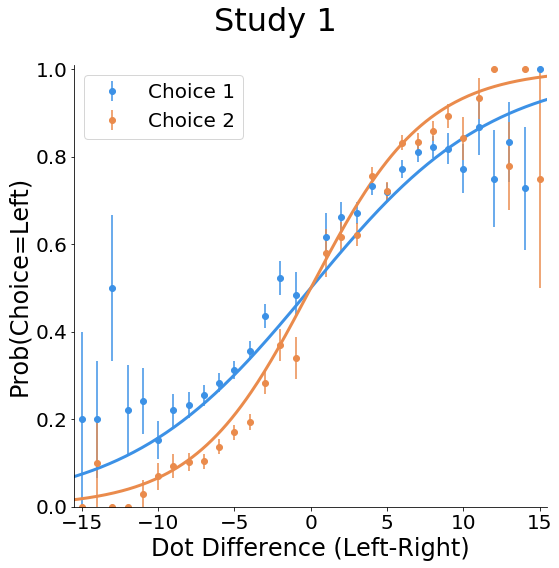

In [20]:
fig=figure(figsize=(8,8))
fig.suptitle('Study 1', fontsize = 32)
logistic_regression(subjects1, Data1)

<a id=Figure1C></a>

### Figure 1C

In [10]:
# make new dataframe for figure 1C
DF1=pd.DataFrame(data=[])
DF1['subject']=subjects1
DF1['ChosenTime']= [float(mean(Data1[Data1['Participant']==x]['ChosenTime']))/4 for x in DF1['subject']] # divide by total sampling time (4s)
DF1['UnchosenTime']=[float(mean(Data1[Data1['Participant']==x]['UnchosenTime']))/4 for x in DF1['subject']] # divide by total sampling time (4s)


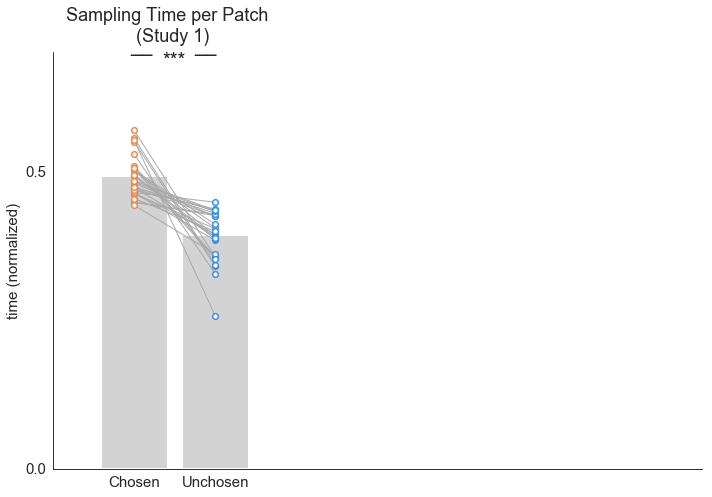

In [50]:
# make figure 1B
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ind = np.arange(1)
margin = 0.05
width = (0.8-1.0*margin)

x_mean = [0, 1]
y_mean = [mean(DF1['ChosenTime']), mean(DF1['UnchosenTime'])]

ax.bar(x_mean, y_mean, align='center', color='lightgray', edgecolor='none') #create bar graph
for subject in subjects1: # create points per participant and lines between them
    ax.scatter(0, DF1[DF1['subject']==subject]['ChosenTime'], zorder=10, marker='o', s=32, color='white', edgecolor='#EA8B4C', lw=1.5)
    ax.scatter(1, DF1[DF1['subject']==subject]['UnchosenTime'], zorder=10, marker='o', s=32, color='white', edgecolor='#3C91E6', lw=1.5)
    x = [0, 1]
    y = [DF1[DF1['subject']==subject]['ChosenTime'].iloc[0], DF1[DF1['subject']==subject]['UnchosenTime'].iloc[0]]
    ax.plot(x, y, color='#A9A9A9', lw=1)
#     ax.plot(1, DF1[DF1['subject']==subject]['UnchosenTime'], color='#A9A9A9', lw=1)
# set axes limits
ax.set_xlim([-1,7]) 
ax.set_ylim([-0.001,0.7])

# add some text for labels, title and axes ticks
ax.set_ylabel("time (normalized)", fontsize=15)
ax.set_title("Sampling Time per Patch \n (Study 1)", fontsize=18)
ttl = ax.title
ttl.set_position([0.18, 1.01])
ax.set_xticks((np.arange(2)))
yticks = np.arange(0.0, 0.7, 0.5)
ax.set_yticks(yticks)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xticklabels(("Chosen", "Unchosen"), fontsize=15)
grid(False)
sns.set_style('white', {'axes.linewidth': 1, 'axes.edgecolor':'black'})

ax.annotate('***', xy=(0.35,0.675), xycoords='data', fontsize=20)
            
ax.annotate('__', xy=(-0.05,0.70), xycoords='data', fontsize=20)
            
ax.annotate('__', xy=(0.745,0.70), xycoords='data', fontsize=20)

sns.despine(right=True, top=True)
plt.tight_layout()

<a id=tACCStudy1></a>

### T-test Accuracy Study 1

In [11]:
DF1['Correct1']=[float(mean(Data1[Data1['Participant']==x]['Correct1'])) for x in DF1['subject']]
DF1['Correct2']=[float(mean(Data1[Data1['Participant']==x]['Correct2'])) for x in DF1['subject']]

In [15]:
sp.stats.ttest_rel(DF1['Correct1'],DF1['Correct2'])

Ttest_relResult(statistic=-8.741529860693433, pvalue=2.3407824744886355e-09)

<a id=tFigure1C></a>

### T-test Figure 1C

In [12]:
sp.stats.ttest_rel(DF1['ChosenTime'],DF1['UnchosenTime'])

Ttest_relResult(statistic=7.277405280948748, pvalue=7.923831501778047e-08)

<a id=Figure2A></a>

### Figure 2A

In [12]:
## bin confidence ratings
bins=np.linspace(-2,2,9)
Data1['Conf_bin']=pd.cut(Data1['ZConf1'],bins,labels=np.linspace(-1.75,1.75,8))

In [21]:
Data1.columns

Index(['Participant', 'Trial', 'Correct1', 'CorrectKey', 'Response1', 'RT1',
       'DotDifference', 'DotNumberRight', 'DotNumberLeft', 'Conf1', 'Conf1_RT',
       'CipResponse', 'CipRT', 'Correct2', 'Response2', 'RT2', 'Conf2',
       'Conf2_RT', 'ZConf1', 'ZConf2', 'Switch', 'ZSwitch', 'ZDifficult',
       'Block', 'NonAbsDiff', 'ZNonAbsDiff', 'LeftTime', 'RightTime',
       'ChosenTime', 'UnchosenTime', 'Change', 'Type', 'DeltaSampling',
       'ZDeltaSampling', 'ConfChange', 'Left1', 'Left2', 'Conf_bin'],
      dtype='object')

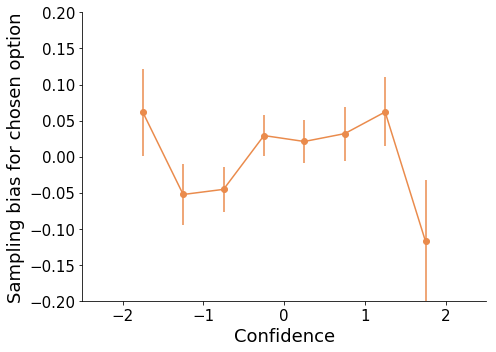

In [25]:
def model(x):
    y = 1 / (1 + np.exp(-x))
    return y
    #run the classifier
clf = sklearn.linear_model.LinearRegression()
logit1 = []
fig = figure(figsize=(7,5))
# fig.suptitle('Change of Mind and Sampling Bias', fontsize = 18)
plot = fig.add_subplot(1,1,1)
X_test = np.linspace(0,1,300)

mean_prob_choice = []
errors = []
bins = np.linspace(-1.75,1.75,8)
for y in bins:
    mean_prob_choice.append(mean(Data1[Data1['Conf_bin']==y]['ZDeltaSampling']))
    errors.append(stats.sem(Data1[Data1['Conf_bin']==y]['ZDeltaSampling']))
plot.errorbar(bins, mean_prob_choice, yerr=errors, fmt='-o', color='#EA8B4C')

plot.set_xlabel('Confidence', size=18)
plot.set_ylabel('Sampling bias for chosen option', size=18)
plot.set_xlim(-2.5, 2.5)
plot.set_ylim(-0.2, 0.2)
plot.tick_params(axis='both', which='major', labelsize=15)

#sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
grid(False)
sns.despine(right=True, top=True)
plt.subplots_adjust(top=0.9, left=0.1)
plt.tight_layout()



<a id=Figure2B></a>

### Figure 2B

In [36]:
%%R
require("optimx")   ## for optim optimizers
require("nloptr")
nlminbw   <- lme4:::nlminbwrap

In [17]:
Data1.columns

Index(['Participant', 'Trial', 'Correct1', 'CorrectKey', 'Response1', 'RT1',
       'DotDifference', 'DotNumberRight', 'DotNumberLeft', 'Conf1', 'Conf1_RT',
       'CipResponse', 'CipRT', 'Correct2', 'Response2', 'RT2', 'Conf2',
       'Conf2_RT', 'ZConf1', 'ZConf2', 'Switch', 'ZSwitch', 'ZDifficult',
       'Block', 'NonAbsDiff', 'ZNonAbsDiff', 'LeftTime', 'RightTime',
       'ChosenTime', 'UnchosenTime', 'Change', 'Type', 'DeltaSampling',
       'ZDeltaSampling', 'ConfChange', 'Left1', 'Left2', 'Conf_bin'],
      dtype='object')

In [13]:
# create choice variable 0=right, 1=left
Data1['Choice']=[1 if x =='left' else 0 for x in Data1['Response1']]

In [19]:
# load data in R
# import new dataframe into R
r_df = pandas2ri.py2ri(Data1)
%R -i r_df

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Conf_bin". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


In [38]:
# fit hierarchical regression model predicting sampling bias as a function of choice, dot difference and confidence rating
%R sampling_model1 = lmer(ZDeltaSampling ~ Choice + NonAbsDiff + ZConf1 + Choice*ZConf1 + (1 + Choice + NonAbsDiff + ZConf1 + Choice*ZConf1 | Participant), control = lmerControl(optimizer='bobyqa', calc.derivs = FALSE), data=r_df)
%R print(summary(sampling_model1))

Linear mixed model fit by REML ['lmerMod']
Formula: ZDeltaSampling ~ Choice + NonAbsDiff + ZConf1 + Choice * ZConf1 +  
    (1 + Choice + NonAbsDiff + ZConf1 + Choice * ZConf1 | Participant)
   Data: r_df
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 14159.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3463 -0.6178 -0.0116  0.6362  4.6527 

Random effects:
 Groups      Name          Variance  Std.Dev. Corr                   
 Participant (Intercept)   0.0189544 0.13767                         
             Choice        0.0603223 0.24561  -0.96                  
             NonAbsDiff    0.0002879 0.01697  -0.22  0.18            
             ZConf1        0.0129680 0.11388   0.25 -0.40 -0.49      
             Choice:ZConf1 0.0207155 0.14393  -0.43  0.61  0.50 -0.89
 Residual                  0.7153908 0.84581                         
Number of obs: 5600, groups:  Participant, 28

Fixed effects:
               Estimate Std. Error t valu

<a id=Functions></a>

In [39]:
%%R
# correct p-values (needed for hierarchical linear regressions)
df.KR <- get_ddf_Lb(sampling_model1, fixef(sampling_model1))
df.KR

coefs <- data.frame(coef(summary(sampling_model1)))
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs

                 Estimate  Std..Error   t.value         p.KR
(Intercept)   -0.26801253 0.031592043 -8.483545 4.318942e-09
Choice         0.51152233 0.053052252  9.641859 3.134399e-10
NonAbsDiff     0.05190484 0.003984211 13.027632 3.790301e-13
ZConf1        -0.07975345 0.027700875 -2.879095 7.717741e-03
Choice:ZConf1  0.19047765 0.036230828  5.257336 1.533197e-05


In [40]:
# get subject-level coefficients from regression
%R coefs <- coef(sampling_model1)$Participant;
%R -o coefs

In [41]:
## add subject column
coefs['subject']=subjects1

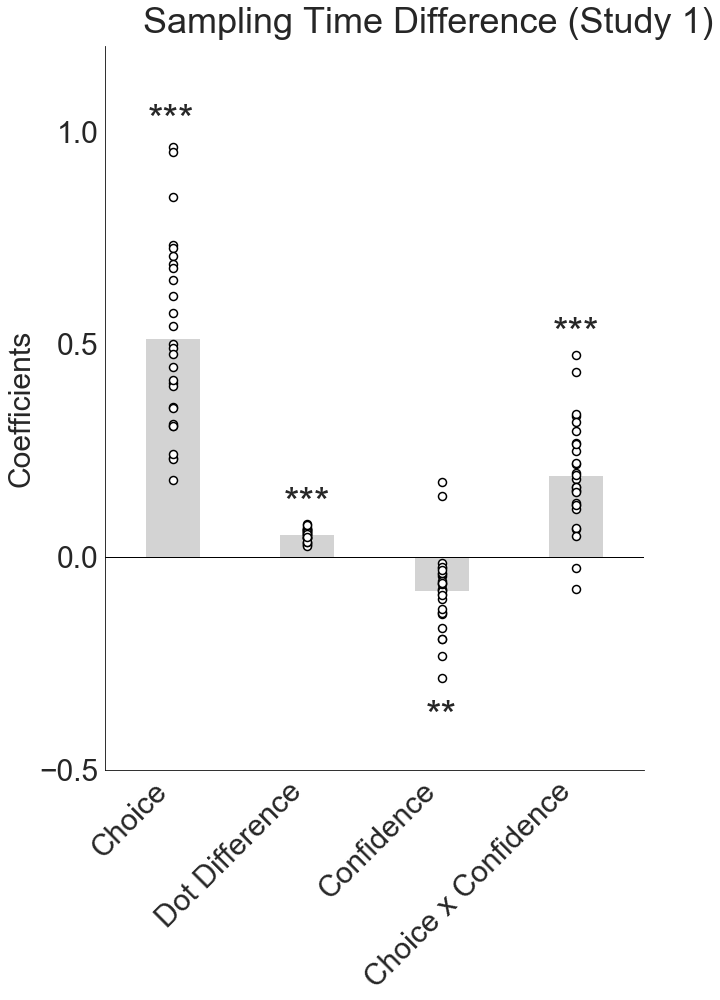

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 14)
ind = np.arange(1)
margin = 0.05
width = (0.8-1.0*margin)

x_mean = [0, 1, 2, 3]
y_mean = [mean(coefs['Choice']), mean(coefs['NonAbsDiff']), mean(coefs['ZConf1']), mean(coefs['Choice:ZConf1'])]

ax.bar(x_mean, y_mean, width=0.4, align='center', color='lightgray', edgecolor='none') # create bar graph
for subject in subjects1: # create scatter
    ax.scatter(0, coefs[coefs['subject']==subject]['Choice'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(1, coefs[coefs['subject']==subject]['NonAbsDiff'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(2, coefs[coefs['subject']==subject]['ZConf1'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(3, coefs[coefs['subject']==subject]['Choice:ZConf1'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)

# set axes limits
ax.set_xlim([-0.5,3.5])
ax.set_ylim([-0.5,1.2])

# add some text for labels, title and axes ticks
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
grid(False)
sns.despine(right=True, top=True)
ax.set_ylabel("Coefficients", fontsize=30)
ax.set_title("Sampling Time Difference (Study 1)", fontsize=36)
ttl = ax.title
ttl.set_position([0.6, 1.01])
ax.set_xticks((np.arange(4)))
yticks = np.arange(-0.5, 1.2, 0.5)
ax.set_yticks(yticks)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xticklabels(("Choice", "Dot Difference", "Confidence", "Choice x Confidence"), rotation=45, ha='right', fontsize=30)
#ax.set_axis_bgcolor('white')

pylab.axhline(y=0.0, linewidth=1, color = 'k')

ax.annotate('***', xy=(-0.01,1), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('***', xy=(1,0.1), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('**', xy=(2,-0.4), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('***', xy=(3,0.5), xycoords='data', fontsize=40, ha='center')
            
plt.tight_layout()


<a id=Figure2C></a>

<a id=Figure2C></a>

### Figure 2C

In [14]:
## define sampling bias as chosen-unchosen time
Data1['SamplingBias']=Data1['ChosenTime']-Data1['UnchosenTime']

In [15]:
# create new index for z-scoring
new_index=range(len(Data1))
Data1['index']=new_index
Data1['participant']=Data1['Participant'] # create copy of participant column
Data1 = Data1.set_index(['Participant', 'index'])

In [16]:
## z-score sampling bias
Data1.head()
Data1['ZBias'] = (Data1['SamplingBias']-Data1.groupby(level='Participant')['SamplingBias'].mean())/Data1.groupby(level = 'Participant')['SamplingBias'].std()
# Are the mean Z-scores all close to 0?
Data1.groupby(level=0)['ZBias'].mean()


Participant
1    -6.772360e-17
2     2.420286e-16
3    -3.619327e-16
4    -2.664535e-17
5     1.110223e-18
6     1.060263e-16
7    -1.432188e-16
8     3.139156e-16
9     2.686740e-16
10   -3.552714e-17
11    6.439294e-17
12   -8.326673e-17
13    3.663736e-17
14   -9.436896e-17
16    2.817191e-16
17   -6.800116e-17
18    8.104628e-17
19    2.914335e-17
20   -3.871903e-17
21   -2.645106e-16
22    6.428191e-16
23    1.282308e-16
24    1.193490e-17
25   -2.109077e-16
26   -3.405609e-16
27   -2.386980e-16
29    1.765255e-16
30    5.939693e-17
Name: ZBias, dtype: float64

In [17]:
# square dot difference (fewer convergence issues)
Data1['DDsqrt']=sqrt(Data1['DotDifference'])

In [73]:
# load data into R
r_df = pandas2ri.py2ri(Data1)
%R -i r_df
%R r_df['Change']=r_df['Change'][,1]

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Conf_bin". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [74]:
# fit logistic regression model predicting change of mind as a function of dot difference, sampling bias and confidence
%R changemodel1 = glmer(Change ~ DDsqrt + ZBias + ZConf1 + (1 + DDsqrt + ZBias + ZConf1 | participant), data=r_df, control = glmerControl(optimizer='bobyqa', calc.derivs = FALSE), family="binomial")
%R print(summary(changemodel1))


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Change ~ DDsqrt + ZBias + ZConf1 + (1 + DDsqrt + ZBias + ZConf1 |  
    participant)
   Data: r_df
Control: glmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
  4668.0   4760.8  -2320.0   4640.0     5586 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9698 -0.4983 -0.2696 -0.0795 10.4281 

Random effects:
 Groups      Name        Variance Std.Dev. Corr             
 participant (Intercept) 0.311488 0.5581                    
             DDsqrt      0.001005 0.0317   -1.00            
             ZBias       0.284694 0.5336    0.02 -0.02      
             ZConf1      0.046305 0.2152    0.45 -0.45 -0.16
Number of obs: 5600, groups:  participant, 28

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.17566    0.20793  -5.654 1.57e-08 ***
DDsqrt      -0.2396

In [99]:
# get subject-level coefficients from regression
%R coefs <- coef(changemodel1)$participant;
%R -o coefs

In [100]:
## add subject column
coefs['subject']=subjects1

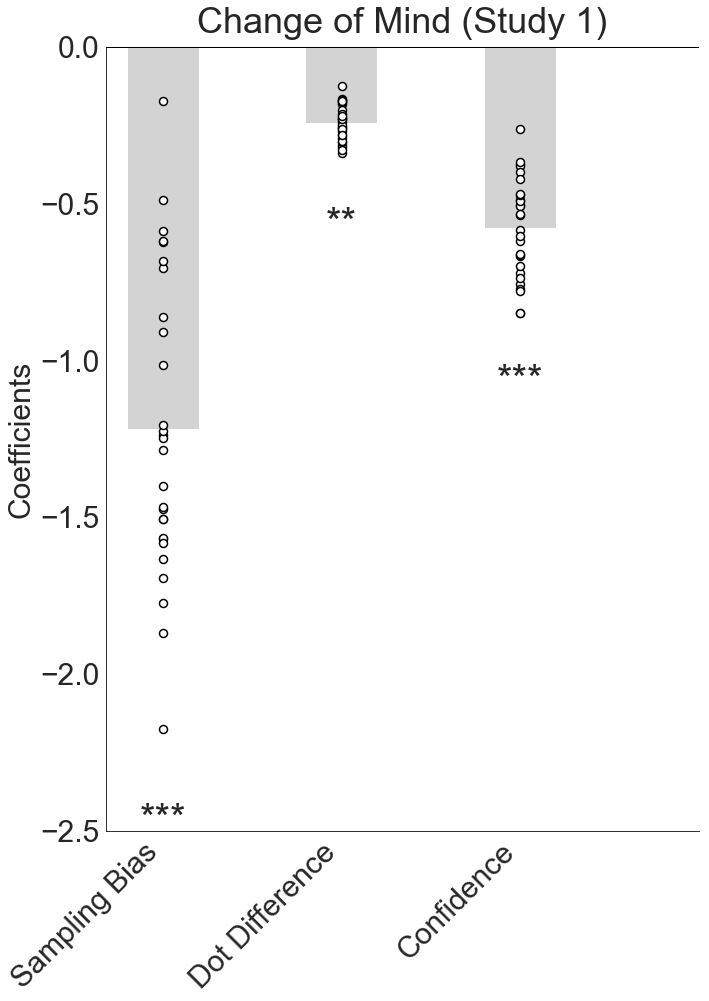

In [103]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 14)
ind = np.arange(1)
margin = 0.05
width = (0.8-1.0*margin)

x_mean = [0, 1, 2]
y_mean = [mean(coefs['ZBias']), mean(coefs['DDsqrt']), mean(coefs['ZConf1'])]

ax.bar(x_mean, y_mean, width=0.4, align='center', color='lightgray', edgecolor='none') # create bar graph
for subject in subjects1: # create scatter
    ax.scatter(0, coefs[coefs['subject']==subject]['ZBias'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(1, coefs[coefs['subject']==subject]['DDsqrt'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(2, coefs[coefs['subject']==subject]['ZConf1'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)

# add some text for labels, title and axes ticks
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
grid(False)
sns.despine(right=True, top=True)
ax.set_ylabel("Coefficients", fontsize=30)
ax.set_title("Change of Mind (Study 1)", fontsize=36)
ttl = ax.title
ttl.set_position([0.5, 1.01])
ax.set_xticks((np.arange(4)))
yticks = np.arange(-2.5, 0.5, 0.5)
ax.set_yticks(yticks)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xticklabels(('Sampling Bias', 'Dot Difference', 'Confidence'), rotation=45, ha='right', fontsize=30)
#ax.set_axis_bgcolor('white')

pylab.axhline(y=0.0, linewidth=1, color = 'k')

ax.annotate('***', xy=(0,-2.5), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('**', xy=(1,-0.6), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('***', xy=(2,-1.1), xycoords='data', fontsize=40, ha='center')
            
plt.tight_layout()


<a id=Figure3B></a>

### Figure 3B

In [18]:
# make new dummy variable encoding whether or not a left response was made for both choices
Data2['Left1'] = [1 if x == 'left' else 0 for x in Data2['Response1']]
Data2['Left2'] = [1 if x == 'left' else 0 for x in Data2['Response2']]

In [127]:
Data2.columns

Index(['participant', 'Trial', 'Block', 'RT1', 'RT2', 'Conf1', 'Conf2',
       'Correct1', 'Correct2', 'Conf1_RT', 'Conf2_RT', 'DotNumberLeft',
       'DotNumberRight', 'DotDifference', 'Switch', 'Left_Presentation_Time',
       'Right_Presentation_Time', 'LeftTime', 'RightTime', 'NonAbsDiff',
       'Response1', 'Response2', 'ZConf1', 'ZConf2', 'Zdifficult',
       'ZNonAbsDiff', 'SamplingLength', 'Session', 'Type', 'ZSwitch',
       'DeltaSampling', 'ZDeltaSampling', 'ChosenTime', 'UnchosenTime',
       'Chosen_Presentation_Time', 'Unchosen_Presentation_Time', 'ConfChange',
       'Left_IA_First_Dwell_Time', 'Right_IA_First_Dwell_Time',
       'LeftTime_First', 'RightTime_First', 'Left1', 'Left2'],
      dtype='object')

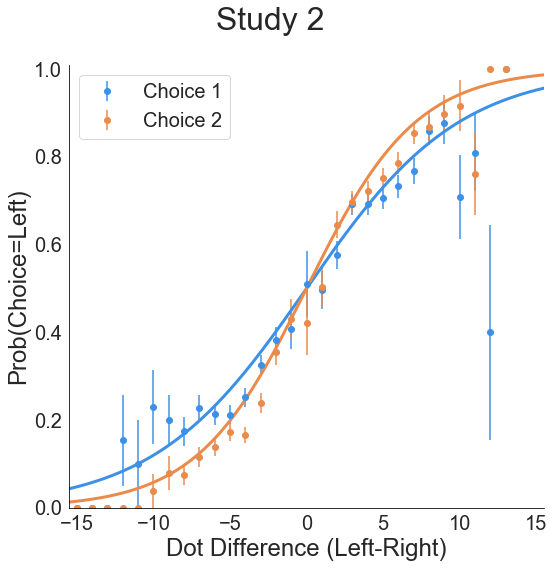

In [124]:
fig=figure(figsize=(8,8))
fig.suptitle('Study 2', fontsize = 32)
logistic_regression(subjects2, Data2)


<a id=Figure3C></a>

### Figure 3C

In [19]:
# calculate proportion of sampling time spent on chosen and unchosen options
Data2Free['ChosenPercTime'] = Data2Free['ChosenTime']/Data2Free['SamplingLength']
Data2Free['UnchosenPercTime'] = Data2Free['UnchosenTime']/Data2Free['SamplingLength']

In [20]:
# make new dataframe for figure 1C
DF2=pd.DataFrame(data=[])
DF2['subject']=subjects2
DF2['ChosenTime']= [float(mean(Data2Free[Data2Free['participant']==x]['ChosenPercTime'])) for x in DF2['subject']]
DF2['UnchosenTime']=[float(mean(Data2Free[Data2Free['participant']==x]['UnchosenPercTime'])) for x in DF2['subject']]



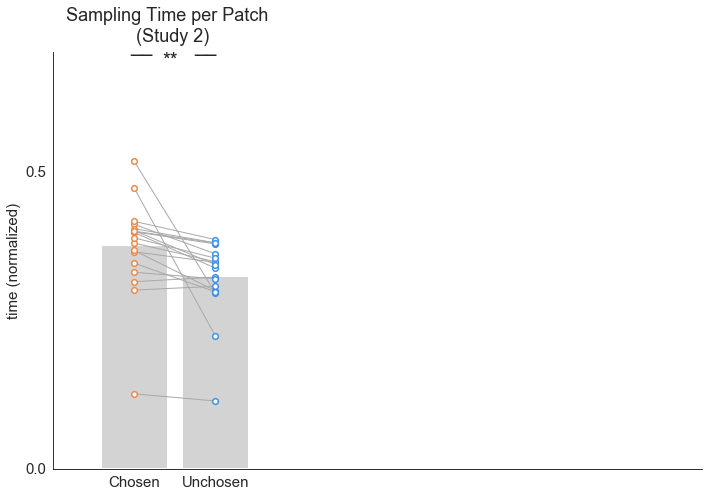

In [142]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ind = np.arange(1)
margin = 0.05
width = (0.8-1.0*margin)

x_mean = [0, 1]
y_mean = [mean(DF2['ChosenTime']), mean(DF2['UnchosenTime'])]

ax.bar(x_mean, y_mean, align='center', color='lightgray', edgecolor='none') #create bar graph
for subject in subjects2: # create points per participant and lines between them
    ax.scatter(0, DF2[DF2['subject']==subject]['ChosenTime'], zorder=10, marker='o', s=32, color='white', edgecolor='#EA8B4C', lw=1.5)
    ax.scatter(1, DF2[DF2['subject']==subject]['UnchosenTime'], zorder=10, marker='o', s=32, color='white', edgecolor='#3C91E6', lw=1.5)
    x = [0, 1]
    y = [DF2[DF2['subject']==subject]['ChosenTime'].iloc[0], DF2[DF2['subject']==subject]['UnchosenTime'].iloc[0]]
    ax.plot(x, y, color='#A9A9A9', lw=1)
# set axes limits    
ax.set_xlim([-1,7])
ax.set_ylim([-0.001,0.7])
    
    
# add some text for labels, title and axes ticks
ax.set_ylabel("time (normalized)", fontsize=15)
ax.set_title("Sampling Time per Patch \n (Study 2)", fontsize=18)
ttl = ax.title
ttl.set_position([0.18, 1.01])
ax.set_xticks((np.arange(2)))
yticks = np.arange(0, 0.7, 0.5)
ax.set_yticks(yticks)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xticklabels(("Chosen", "Unchosen"), fontsize=15)
#ax.set_axis_bgcolor('white')

#sns.set_style('white', {'axes.linewidth': 1, 'axes.edgecolor':'black'})

ax.annotate('**', xy=(0.35,0.675), xycoords='data', fontsize=20)
            #xy=(0, 1), xycoords='data',
            #xytext=(-50, 30), textcoords='offset points',
            #arrowprops=dict(arrowstyle="->"))
            
ax.annotate('__', xy=(-0.05,0.70), xycoords='data', fontsize=20)
            #xy=(0, 1), xycoords='data',
            #xytext=(-50, 30), textcoords='offset points',
            #arrowprops=dict(arrowstyle="->"))
            
ax.annotate('__', xy=(0.745,0.70), xycoords='data', fontsize=20)
            #xy=(0, 1), xycoords='data',
            #xytext=(-50, 30), textcoords='offset points',
            #arrowprops=dict(arrowstyle="->"))

sns.despine(right=True, top=True)
grid(False)
plt.tight_layout()


<a id=tACCStudy2></a>

### T-test Accuracy Study 2

In [21]:
DF2['Correct1']=[float(mean(Data2[Data2['participant']==x]['Correct1'])) for x in DF2['subject']]
DF2['Correct2']=[float(mean(Data2[Data2['participant']==x]['Correct2'])) for x in DF2['subject']]

In [149]:
sp.stats.ttest_rel(DF2['Correct1'],DF2['Correct2'])

Ttest_relResult(statistic=-7.140839930733507, pvalue=1.6535371024436757e-06)

<a id=tFigure3C></a>

### T-test Figure 3C

In [150]:
sp.stats.ttest_rel(DF2['ChosenTime'],DF2['UnchosenTime'])

Ttest_relResult(statistic=3.1642762349979305, pvalue=0.0056665252371096144)

<a id=Figure4A></a>

### Figure 4A

In [22]:
bins=np.linspace(-2,2,9)
Data2Free['Conf_bin']=pd.cut(Data2Free['ZConf1'],bins,labels=np.linspace(-1.75,1.75,8))

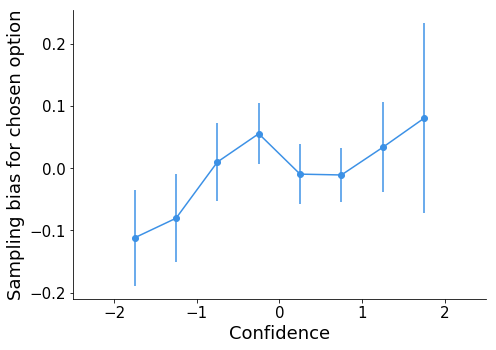

In [24]:
def model(x):
    y = 1 / (1 + np.exp(-x))
    return y
    #run the classifier
clf = sklearn.linear_model.LinearRegression()
logit1 = []
fig = figure(figsize=(7,5))
# fig.suptitle('Change of Mind and Sampling Bias', fontsize = 18)
plot = fig.add_subplot(1,1,1)
X_test = np.linspace(0,1,300)

# plot study 1
mean_prob_choice = []
errors = []
bins = np.linspace(-1.75,1.75,8)
for y in bins:
    mean_prob_choice.append(mean(Data2Free[Data2Free['Conf_bin']==y]['ZDeltaSampling']))
    errors.append(stats.sem(Data2Free[Data2Free['Conf_bin']==y]['ZDeltaSampling']))
plot.errorbar(bins, mean_prob_choice, yerr=errors, fmt='-o', color='#3C91E6')

plot.set_xlabel('Confidence', size=18)
plot.set_ylabel('Sampling bias for chosen option', size=18)
plot.set_xlim(-2.5, 2.5)
plot.tick_params(axis='both', which='major', labelsize=15)

#sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
grid(False)
# plot.legend(loc=2, prop={'size':18})
sns.despine(right=True, top=True)
plt.subplots_adjust(top=0.9, left=0.1)
plt.tight_layout()

<a id=Figure4B></a>

### Figure 4B

In [ ]:
%%R
require("optimx")   ## for optim optimizers
require("nloptr")
nlminbw   <- lme4:::nlminbwrap

In [27]:
Data2Free['Choice']=[1 if x == 'left' else 0 for x in Data2Free['Response1']]

In [29]:
# load data in R
# import new dataframe into R
r_df = pandas2ri.py2ri(Data2Free)
%R -i r_df

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "Conf_bin". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


In [71]:
%%R
# fit hierarchical regression model predicting sampling bias as a function of choice, dot difference and confidence rating
sampling_model2 = lmer(ZDeltaSampling ~ Choice + NonAbsDiff + ZConf1 + Choice*ZConf1 + (1 + Choice + NonAbsDiff + ZConf1 + Choice*ZConf1 | participant), control = lmerControl(optimizer ='bobyqa', calc.derivs = FALSE), data=r_df)
print(summary(sampling_model2))

Linear mixed model fit by REML ['lmerMod']
Formula: ZDeltaSampling ~ Choice + NonAbsDiff + ZConf1 + Choice * ZConf1 +  
    (1 + Choice + NonAbsDiff + ZConf1 + Choice * ZConf1 | participant)
   Data: r_df
Control: lmerControl(optimizer = "bobyqa", calc.derivs = FALSE)

REML criterion at convergence: 6012.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4947 -0.5902 -0.0023  0.6129  4.2636 

Random effects:
 Groups      Name          Variance  Std.Dev. Corr                   
 participant (Intercept)   4.415e-02 0.210112                        
             Choice        1.629e-01 0.403625 -1.00                  
             NonAbsDiff    2.982e-05 0.005461 -0.18  0.13            
             ZConf1        1.073e-02 0.103594  0.54 -0.59  0.73      
             Choice:ZConf1 1.360e-02 0.116604 -0.92  0.94 -0.22 -0.83
 Residual                  8.276e-01 0.909709                        
Number of obs: 2244, groups:  participant, 18

Fixed effects:
               Estima

In [75]:
%%R
# correct coefficients & p-value
df.KR <- get_ddf_Lb(sampling_model2, fixef(sampling_model2))
df.KR

coefs <- data.frame(coef(summary(sampling_model2)))
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs

                 Estimate  Std..Error   t.value         p.KR
(Intercept)   -0.14998741 0.057098725 -2.626808 1.768996e-02
Choice         0.30326534 0.104568577  2.900157 9.973125e-03
NonAbsDiff     0.04387825 0.004763963  9.210453 5.177037e-08
ZConf1        -0.09015311 0.037076860 -2.431520 2.640851e-02
Choice:ZConf1  0.21342255 0.049751068  4.289809 4.976109e-04


In [76]:
# grab subject-level coefficients
%R coefs <- coef(sampling_model2)$participant
%R -o coefs

In [77]:
# index coefficient dataframe
coefs['subject']=subjects2

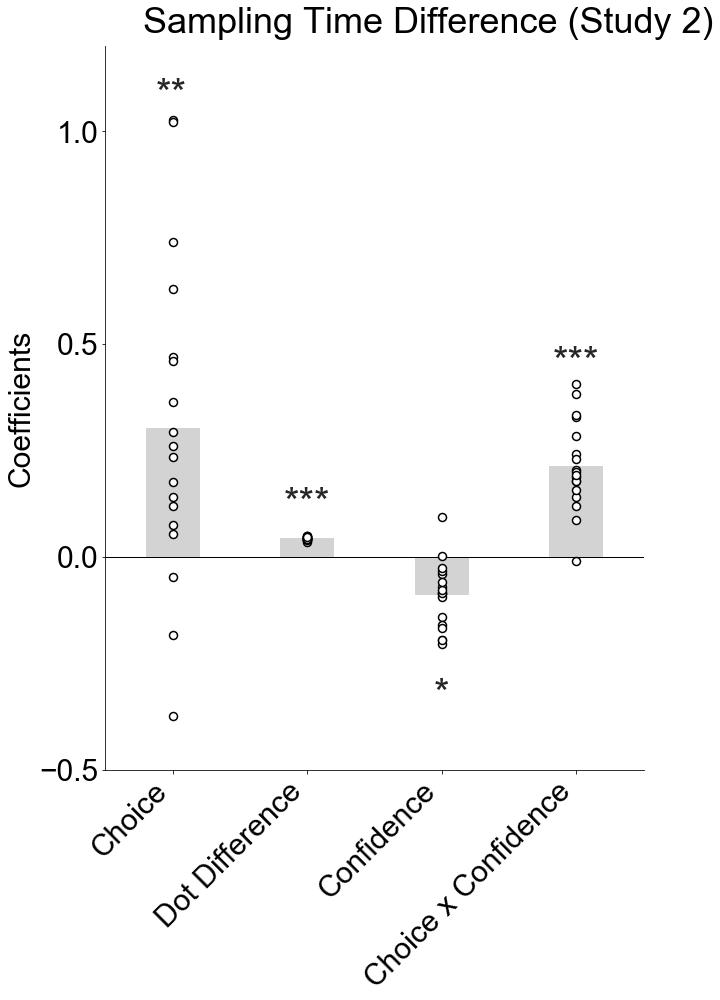

In [80]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 14)
ind = np.arange(1)
margin = 0.05
width = (0.8-1.0*margin)

x_mean = [0, 1, 2, 3]
y_mean = [mean(coefs['Choice']), mean(coefs['NonAbsDiff']), mean(coefs['ZConf1']), mean(coefs['Choice:ZConf1'])]

ax.bar(x_mean, y_mean, width=0.4, align='center', color='lightgray', edgecolor='none') # create bar graph
for subject in subjects2: # create scatter
    ax.scatter(0, coefs[coefs['subject']==subject]['Choice'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(1, coefs[coefs['subject']==subject]['NonAbsDiff'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(2, coefs[coefs['subject']==subject]['ZConf1'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(3, coefs[coefs['subject']==subject]['Choice:ZConf1'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)

# set axes limits
ax.set_xlim([-0.5,3.5])
ax.set_ylim([-0.5,1.2])

# add some text for labels, title and axes ticks
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
grid(False)
sns.despine(right=True, top=True)
ax.set_ylabel("Coefficients", fontsize=30)
ax.set_title("Sampling Time Difference (Study 2)", fontsize=36)
ttl = ax.title
ttl.set_position([0.6, 1.01])
ax.set_xticks((np.arange(4)))
yticks = np.arange(-0.5, 1.2, 0.5)
ax.set_yticks(yticks)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xticklabels(("Choice", "Dot Difference", "Confidence", "Choice x Confidence"), rotation=45, ha='right', fontsize=30)
#ax.set_axis_bgcolor('white')

pylab.axhline(y=0.0, linewidth=1, color = 'k')

ax.annotate('**', xy=(-0.01,1.06), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('***', xy=(1,0.1), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('*', xy=(2,-0.35), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('***', xy=(3,0.43), xycoords='data', fontsize=40, ha='center')
            
plt.tight_layout()


<a id=Figure4C></a>

### Figure 4C

In [103]:
## define sampling bias as chosen-unchosen time
Data2['SamplingBias']=Data2['ChosenTime']-Data2['UnchosenTime']

In [83]:
# re-index for z-scoring
Data2.reset_index(inplace=True)
Data2.index = range(1, len(Data2) + 1)
Data2['Participant']=Data2['participant']
Data2 = Data2.set_index(['Participant', 'index'])

In [104]:
# Z-score new bias variable 
Data2.head()
Data2['ZBias'] = (Data2['SamplingBias']-Data2.groupby(level='Participant')['SamplingBias'].mean())/Data2.groupby(level = 'Participant')['SamplingBias'].std()
# Are the mean Z-scores all close to 0?
Data2.groupby(level=0)['ZBias'].mean()

Participant
1    -1.546382e-16
2    -1.441963e-16
7    -6.265159e-17
9    -2.244677e-16
10    3.788856e-17
11   -2.643388e-18
13    1.950600e-16
14    4.141308e-17
15   -2.819614e-17
17    2.643388e-18
18   -1.186136e-19
19   -4.053195e-17
20   -7.220963e-18
21   -2.202823e-17
22   -1.503427e-17
24    1.251204e-16
25    1.497920e-17
26    1.127846e-16
Name: ZBias, dtype: float64

In [93]:
# square dot difference (fewer convergence issues)
Data2['DDsqrt']=sqrt(Data2['DotDifference'])

In [88]:
# create variable for free vs fixed viewing session (0=free; 1=fixed)
Data2['FixedSampling']=[1 if x == 'Fixed' else 0 for x in Data2['Session']]

In [90]:
# create variable for change of mind (0=no change; 1=change)
Data2['change']=0
Data2.loc[Data2['Response1']!=Data2['Response2'], 'change']=1

In [105]:
# load data into R
r_df = pandas2ri.py2ri(Data2)
%R -i r_df

In [112]:
%%R
changemodel2 <- glmer(change ~ ZBias + DDsqrt + ZConf1 + FixedSampling + FixedSampling*ZBias + (1 + ZBias + DDsqrt + ZConf1 + FixedSampling + FixedSampling*ZBias | participant), data=r_df, control = lmerControl(optimizer = "optimx", calc.derivs = FALSE, optCtrl = list(method = "nlminbw", starttests = FALSE, kkt = FALSE)), family="binomial")
print(summary(changemodel2))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: change ~ ZBias + DDsqrt + ZConf1 + FixedSampling + FixedSampling *  
    ZBias + (1 + ZBias + DDsqrt + ZConf1 + FixedSampling + FixedSampling *  
    ZBias | participant)
   Data: r_df
Control: 
lmerControl(optimizer = "optimx", calc.derivs = FALSE, optCtrl = list(method = "nlminbw",  
    starttests = FALSE, kkt = FALSE))

     AIC      BIC   logLik deviance df.resid 
  4080.5   4253.6  -2013.3   4026.5     4473 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5424 -0.4985 -0.3538 -0.1898  5.2785 

Random effects:
 Groups      Name                Variance Std.Dev. Corr                   
 participant (Intercept)         0.83766  0.9152                          
             ZBias               0.43421  0.6589    0.45                  
             DDsqrt              0.04157  0.2039   -0.99 -0.33            
             ZConf1            

In [115]:
# grab subject-level coefficients
%R coefs <- coef(changemodel2)$participant
%R -o coefs

In [116]:
# index coefficient dataframe
coefs['subject']=subjects2

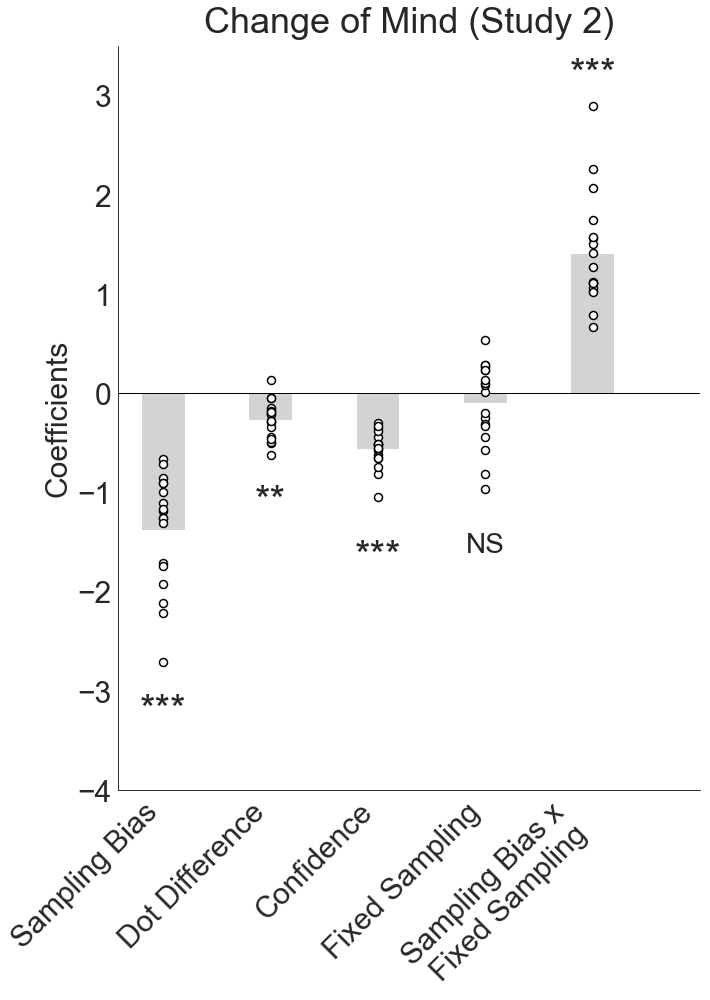

In [120]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 14)
ind = np.arange(1)
margin = 0.05
width = (0.8-1.0*margin)

x_mean = [0, 1, 2, 3, 4]
y_mean = [mean(coefs['ZBias']), mean(coefs['DDsqrt']), mean(coefs['ZConf1']), mean(coefs['FixedSampling']), mean(coefs['ZBias:FixedSampling'])]

ax.bar(x_mean, y_mean, width=0.4, align='center', color='lightgray', edgecolor='none') # create bar graph
for subject in subjects2: # create scatter
    ax.scatter(0, coefs[coefs['subject']==subject]['ZBias'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(1, coefs[coefs['subject']==subject]['DDsqrt'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(2, coefs[coefs['subject']==subject]['ZConf1'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(3, coefs[coefs['subject']==subject]['FixedSampling'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)
    ax.scatter(4, coefs[coefs['subject']==subject]['ZBias:FixedSampling'].iloc[0], zorder=10, marker='o', s=64, color='white', edgecolor='black', lw=1.5)

# set axes limits
ax.set_ylim([-4,3.5])
    
# add some text for labels, title and axes ticks
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
grid(False)
sns.despine(right=True, top=True)
ax.set_ylabel("Coefficients", fontsize=30)
ax.set_title("Change of Mind (Study 2)", fontsize=36)
ttl = ax.title
ttl.set_position([0.5, 1.01])
ax.set_xticks((np.arange(6)))
yticks = np.arange(-4, 4, 1)
ax.set_yticks(yticks)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xticklabels(('Sampling Bias', 'Dot Difference', 'Confidence', 'Fixed Sampling', 'Sampling Bias x\nFixed Sampling'), rotation=45, ha='right', fontsize=30)
#ax.set_axis_bgcolor('white')

pylab.axhline(y=0.0, linewidth=1, color = 'k')

ax.annotate('***', xy=(0,-3.3), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('**', xy=(1,-1.2), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('***', xy=(2,-1.75), xycoords='data', fontsize=40, ha='center')
            
ax.annotate('NS', xy=(3,-1.6), xycoords='data', fontsize=28, ha='center')

ax.annotate('***', xy=(4,3.1), xycoords='data', fontsize=40, ha='center')
            
plt.tight_layout()

<a id=Figure4D></a>

### Figure 4D

In [122]:
# create variables describing proportion of total sampling time spent on each patch
Data2Free['ChosenPercTime']=Data2Free['ChosenTime']/Data2Free['SamplingLength']
Data2Free['UnchosenPercTime']=Data2Free['UnchosenTime']/Data2Free['SamplingLength']
Data2Fixed['ChosenPercTime']=Data2Fixed['ChosenTime']/(Data2Fixed['LeftTime']+Data2Fixed['RightTime'])
Data2Fixed['UnchosenPercTime']=Data2Fixed['UnchosenTime']/(Data2Fixed['LeftTime']+Data2Fixed['RightTime'])



In [132]:
Data2Fixed['ChosenPercTime']

2244    0.314909
2245    0.645529
2246    0.530429
2247    0.385382
2248    0.490627
2249    0.551042
2250    0.613997
2251    0.629173
2252    0.474376
2253    0.353608
2254    0.369039
2255    0.408696
2256    0.536418
2257    0.441441
2258    0.709735
2259    0.600457
2260    0.420025
2261    0.416413
2262    0.240606
2263    0.358025
2264    0.540972
2265    0.521654
2266    0.613535
2267    0.253012
2268    0.451777
2269    0.288923
2270    0.449183
2271    0.503167
2272    0.449822
2273    0.628077
          ...   
4470    0.654555
4471    0.456304
4472    0.674383
4473    0.334687
4474    0.595318
4475    0.618161
4476    0.672747
4477    0.662975
4478    0.547675
4479    0.309224
4480    0.295757
4481    0.541512
4482    0.214531
4483    0.336941
4484    0.696402
4485    0.413874
4486    0.777972
4487    0.497101
4488    0.345910
4489    0.251214
4490    0.443176
4491    0.560909
4492    0.766520
4493    0.226954
4494    0.463390
4495    0.783114
4496    0.256757
4497    0.6631

In [123]:
bins = np.linspace(0.175,0.625,10)
Data2Free['new_bias_bin']=pd.cut(Data2Free['ChosenPercTime'], bins, labels=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6])
Data2Fixed['new_bias_bin']=pd.cut(Data2Fixed['ChosenPercTime'], bins, labels=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6])


In [127]:
# create variable for change of mind (0=no change; 1=change)
Data2Free['change']=0
Data2Free.loc[Data2Free['Response1']!=Data2Free['Response2'], 'change']=1
Data2Fixed['change']=0
Data2Fixed.loc[Data2Fixed['Response1']!=Data2Fixed['Response2'], 'change']=1

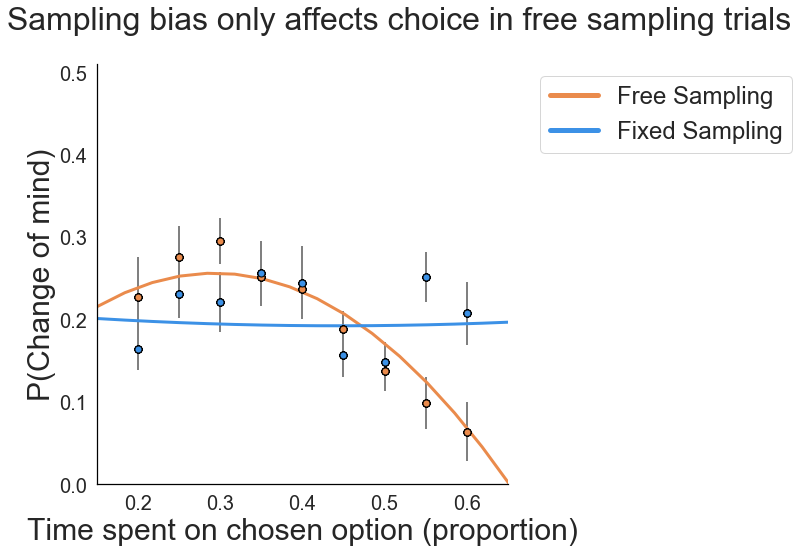

In [137]:
sns.set(font_scale=2)
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
fig=figure(figsize=(12,8))
fig.suptitle('Sampling bias only affects choice in free sampling trials', fontsize = 32)
def model(x):
    y = 1 / (1 + np.exp(-x))
    return y
#run the classifier
clf = sklearn.linear_model.LogisticRegression(C=1e5)
logit1 = []
logit2 = []
plot = fig.add_subplot(1,1,1)
#plot the data
#plt.clf()
colors=['#540D6E', '#46B1C9', '#F5EE9E', '#EAF9D9', '#B5E2FA', '#A5B452', '#CCC7B9', '#DB324D']

mean_prob_free=[]
var_prob_free=[]
mean_prob_fixed=[]
var_prob_fixed=[]
rankdiffs=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
rankdiffs2=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
for y in rankdiffs:
    mean_prob_free.append(mean(Data2Free[Data2Free['new_bias_bin']==y]['change']))
    var_prob_free.append(sp.stats.sem(Data2Free[Data2Free['new_bias_bin']==y]['change']))
for y in rankdiffs2:
    mean_prob_fixed.append(mean(Data2Fixed[Data2Fixed['new_bias_bin']==y]['change']))
    var_prob_fixed.append(sp.stats.sem(Data2Fixed[Data2Fixed['new_bias_bin']==y]['change']))

X_test = np.linspace(-5,5,300)

coefs_free = np.polyfit(Data2Free['ChosenPercTime'].values,  Data2Free['change'].values.flatten(), 2)
coefs_fixed = np.polyfit(Data2Fixed['ChosenPercTime'].values,  Data2Fixed['change'].values.flatten(), 2)

plot.plot(X_test, np.polyval(coefs_free, X_test), linewidth=3, color='#EA8B4C')
plot.plot(X_test, np.polyval(coefs_fixed, X_test), linewidth=3, color='#3C91E6')

for y in rankdiffs:
    plot.errorbar(rankdiffs, mean_prob_free, yerr=var_prob_free, fmt = 'o', marker='o',markerfacecolor='#EA8B4C', markeredgecolor = 'black', ms = 7, ecolor='gray')
    plot.errorbar(rankdiffs2, mean_prob_fixed, yerr=var_prob_fixed, fmt = 'o', marker='o',markerfacecolor='#3C91E6', markeredgecolor = 'black', ms = 7, ecolor='gray')

plot.set_ylabel('P(Change of mind)', size=30)
plot.set_xlabel('Time spent on chosen option (proportion)', size=30)
plot.tick_params(axis='both', which='major', labelsize=20)

plot.set_ylim(0, 0.51)
plot.set_xlim(0.15, 0.65)
plot.grid(True)
grid(False)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#EA8B4C', lw=5),
                Line2D([0], [0], color='#3C91E6', lw=5)]

plot.legend(custom_lines, ['Free Sampling', 'Fixed Sampling'], prop={'size': 24}, bbox_to_anchor=(1.05, 1), loc='upper left')


sns.despine(right=True, top=True)
plt.tight_layout()
plt.subplots_adjust(top=0.88, left=0.15)


<a id=Saccades></a>

### Saccades

In [160]:
# make new dataframe for t-test
DF3=pd.DataFrame(data=[])
DF3['subject']=subjects2
DF3['FreeSaccades']= [float(mean(Data2Free[Data2Free['participant']==x]['Internal_Saccades'])) for x in DF3['subject']]
DF3['FixedSaccades']=[float(mean(Data2Fixed[Data2Fixed['participant']==x]['Internal_Saccades'])) for x in DF3['subject']]


In [161]:
# test if there were more 
sp.stats.ttest_rel(DF3['FreeSaccades'],DF3['FixedSaccades'])

Ttest_relResult(statistic=-4.221057153034456, pvalue=0.0005749020430666255)

<a id=Functions></a>

### Functions used

In [48]:
# plotting psychometric curves
def logistic_regression(subjects, data):
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    #run the classifier
    clf = sklearn.linear_model.LogisticRegression(C=1e5)
    logit1 = []
    logit2 = []
    plot = fig.add_subplot(1,1,1)

    # plot data points choice 1
    mean_prob_choice = []
    errors = []
    rankdiffs = range(-15,16)
    for y in rankdiffs:
        mean_prob_choice.append(mean(data[data['NonAbsDiff']==y]['Left1']))
        errors.append(stats.sem(data[data['NonAbsDiff']==y]['Left1']))
    plt.errorbar(rankdiffs, mean_prob_choice, yerr=errors, fmt='o', label='Choice 1', color='#3C91E6')

    # plot data points choice 2
    mean_prob_choice = []
    errors = []
    for y in rankdiffs:
        mean_prob_choice.append(mean(data[data['NonAbsDiff']==y]['Left2']))
        errors.append(stats.sem(data[data['NonAbsDiff']==y]['Left2']))
    plt.errorbar(rankdiffs, mean_prob_choice, yerr=errors, fmt='o', label='Choice 2', color='#EA8B4C')
    
    X_test = np.linspace(-16,16,300)
    # get fit choice 1
    clf.fit(data['NonAbsDiff'][:, np.newaxis], data['Left1'])
    logit1 = model(X_test*clf.coef_).ravel()

    # get fit choice 2
    clf.fit(data['NonAbsDiff'][:, np.newaxis], data['Left2'])
    logit2 = model(X_test*clf.coef_).ravel()
    
    #plt fits
    plot.plot(X_test, logit1, linewidth=3, color='#3C91E6')
    plot.plot(X_test, logit2, linewidth=3, color='#EA8B4C')

    plot.set_ylabel('Prob(Choice=Left)', size=24)
    plot.set_xlabel('Dot Difference (Left-Right)', size=24)
    plot.tick_params(axis='both', which='major', labelsize=20)

    plot.set_ylim(0, 1.01)
    plot.set_xlim(-15.5, 15.5)
    plot.grid(True)
    grid(False)
    plt.legend(prop={'size':20})    
    sns.despine(right=True, top=True)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88, left=0.15)